<a href="https://colab.research.google.com/github/wisarootl/leetcode/blob/main/Apartment_Hunting_(Very_Hard).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apartment Hunting

You're looking to move into a new apartment on specific street, and you're given a list of contiguous blocks on that street where each block contains an apartment that you could move into.

You also have a list of requirements: a list of buildings that are important to you. For instance, you might value having a school and a gym near your apartment. The list of blocks that you have contains information at every block about all of the buildings that are present and absent at the block in question. For instance, for every block, you might know whether a school, a pool, an office, and a gym are present.

In order to optimize your life, you want to pick an apartment block such that you minimize the farthest distance you'd have to walk from your apartment to reach any of your required buildings.

Write a function that takes in a list of contiguous blocks on a specific street and a list of your required buildings and that returns the location (the index) of the block that's most optimal for you.

If there are multiple most optimal blocks, your function can return the index of any one of them.

Sample Input

```
blocks = [
  {
    "gym": false,
    "school": true,
    "store": false,
  },
  {
    "gym": true,
    "school": false,
    "store": false,
  },
  {
    "gym": true,
    "school": true,
    "store": false,
  },
  {
    "gym": false,
    "school": true,
    "store": false,
  },
  {
    "gym": false,
    "school": true,
    "store": true,
  },
]
reqs = ["gym", "school", "store"]
```



Sample Output

```
3 // at index 3, the farthest you'd have to walk to reach a gym, a school, or a store is 1 block; at any other index, you'd have to walk farther
```



# Solution (Brute Force)

In [ ]:
# Time O(b^2 * r)
# Space O(1)
# b = no. of block
# r = no. of requirements

def apartmentHunting(blocks, reqs):
	min_farest_apartment_req_distance = len(blocks)
	for apartment_idx in range(len(blocks)):
		farest_apartment_req_distance = 0
		for req in reqs:
			left = apartment_idx
			right = apartment_idx
			while True:
				# check left
				if left >= 0:
					if blocks[left][req]:
						if abs(left-apartment_idx) > farest_apartment_req_distance:
							farest_apartment_req_distance = abs(left-apartment_idx)
						break
					else:
						left -= 1

				# check right
				if right <= len(blocks) - 1:
					if blocks[right][req]:
						if abs(right-apartment_idx) > farest_apartment_req_distance:
							farest_apartment_req_distance = abs(right-apartment_idx)
						break
					else:
						right += 1

		if min_farest_apartment_req_distance > farest_apartment_req_distance:
			min_farest_apartment_req_distance = farest_apartment_req_distance
			min_farest_apartment_req = apartment_idx

	return min_farest_apartment_req

In [ ]:
blocks = [
  {
    "gym": False,
    "school": True,
    "store": False,
  },
  {
    "gym": True,
    "school": False,
    "store": False,
  },
  {
    "gym": True,
    "school": True,
    "store": False,
  },
  {
    "gym": False,
    "school": True,
    "store": False,
  },
  {
    "gym": False,
    "school": True,
    "store": True,
  },
]
reqs = ["gym", "school", "store"]

In [ ]:
print(apartmentHunting(blocks, reqs))

3


# Solution (Dynamic Programming)

In [ ]:
# Time O(br)
# Space O(br)
# b = no. of block
# r = no. of requirements

def apartmentHunting(blocks, reqs):
	# min_distances = list(map(lambda req: get_min_distance(blocks, req), reqs))
	min_distances = [get_min_distance(blocks, req) for req in reqs]

	farest_min_distances = get_max_distances(blocks, min_distances)
	min_idx = get_min_idx(farest_min_distances)
	return min_idx

def get_min_distance(blocks, req):
	min_distances_req = [None]*len(blocks)
	latest_req_idx = float('inf')
	for i in range(len(blocks)):
		if blocks[i][req]:
			latest_req_idx = i
		min_distances_req[i] = distance(i, latest_req_idx)

	for i in reversed(range(len(blocks))):
		if blocks[i][req]:
			latest_req_idx = i
		min_distances_req[i] = min(min_distances_req[i], distance(i, latest_req_idx))

	return min_distances_req


def distance(i, j):
	return abs(i - j)

def get_max_distances(blocks, min_distances):
	max_distances = [None]*len(blocks)
	for i in range(len(blocks)):
		min_distance_at_block = [min[i] for min in min_distances]
		max_distances[i] = max(min_distance_at_block)

	return max_distances

def get_min_idx(farest_min_distances):
	min = float('inf')
	for i in range(len(farest_min_distances)):
		if farest_min_distances[i] < min:
			min_idx = i
			min = farest_min_distances[i]
	return min_idx

In [ ]:
print(apartmentHunting(blocks, reqs))

[[1, 0, 0, 1, 2], [0, 1, 0, 0, 0], [4, 3, 2, 1, 0]]
3


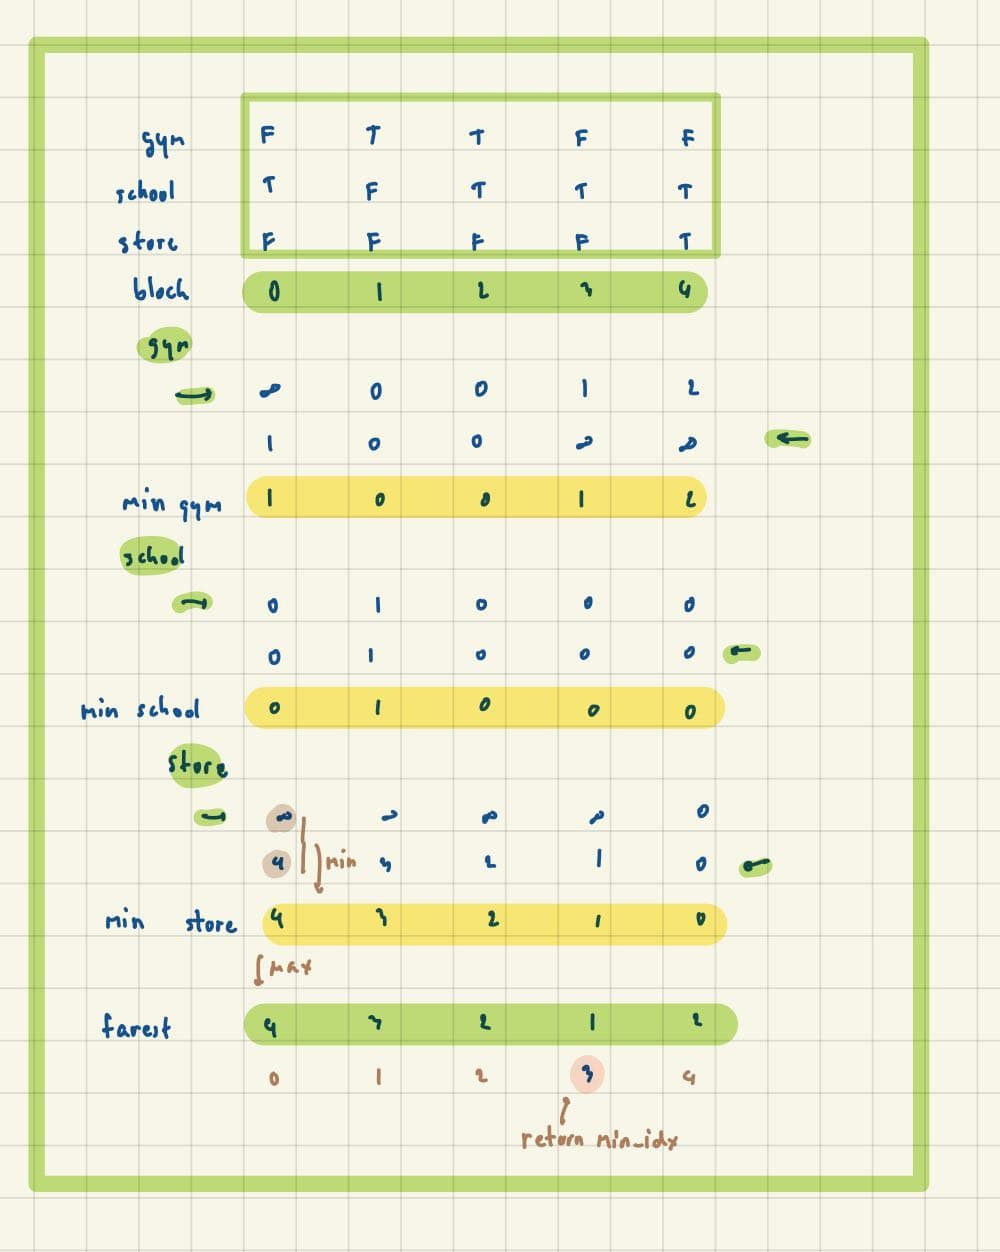
